<a href="https://colab.research.google.com/github/abdoahmed2004/Abdelrahman/blob/main/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libiraries**

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
import seaborn as sns

**Reading** **data**

In [3]:
df = pd.read_csv('/content/Crop_recommendation (2).csv')

In [ ]:
df.head(5)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [5]:
df.isnull().sum()

,0
Nitrogen,0
phosphorus,0
potassium,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
Unnamed: 8,2200
Unnamed: 9,2200


In [6]:
df=df.drop('Unnamed: 8',axis=1)

In [7]:
df=df.drop('Unnamed: 9',axis=1)

In [8]:
df.head(5)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


array([[<Axes: title={'center': 'Nitrogen'}>,
        <Axes: title={'center': 'phosphorus'}>,
        <Axes: title={'center': 'potassium'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

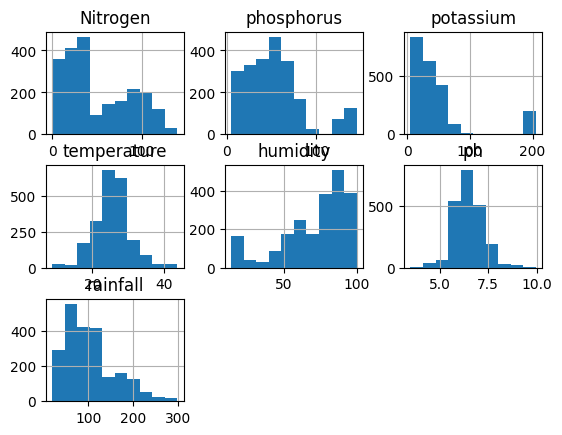

In [9]:
df.hist()

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.duplicated().sum()

0

In [12]:
# Find and print duplicate rows
duplicates = df[df.duplicated()]

# Loop through and print each duplicate row
if not duplicates.empty:
    print("Duplicate rows found:")
    for index, row in duplicates.iterrows():
        print(f"Row {index}:")
        print(row)
        print("-" * 50)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [13]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


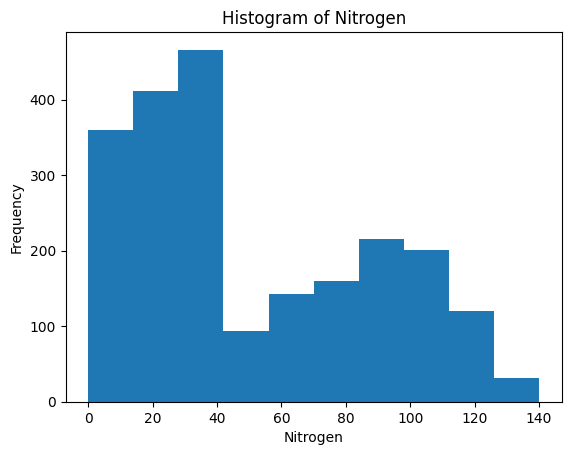

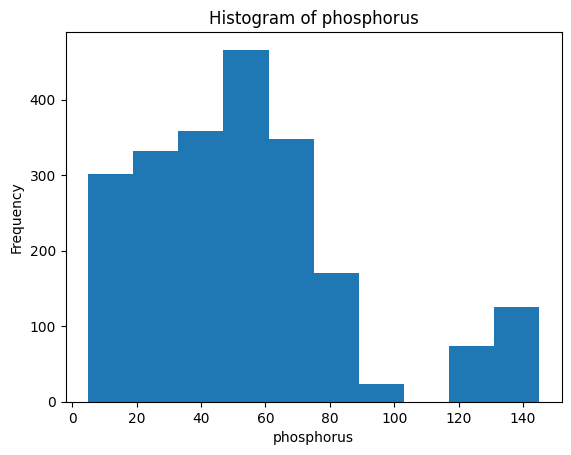

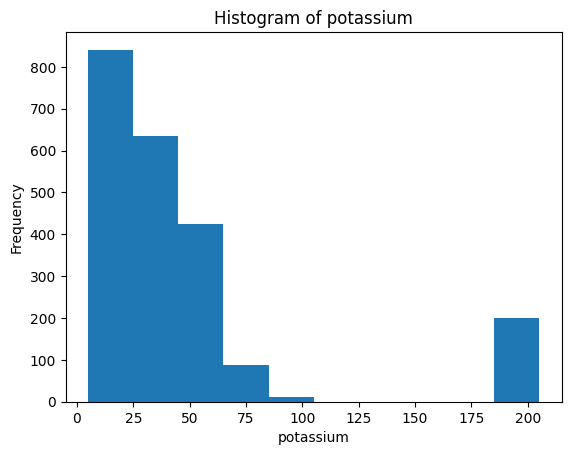

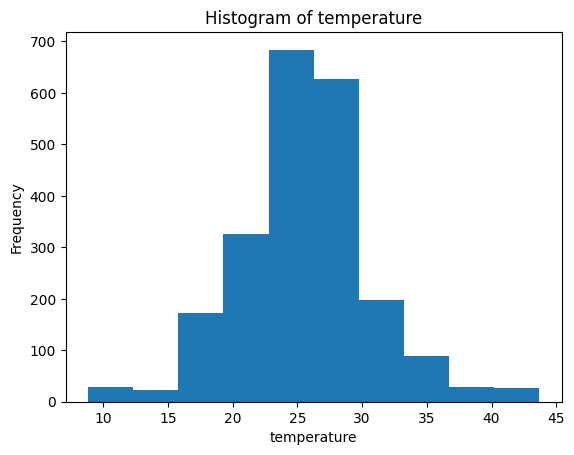

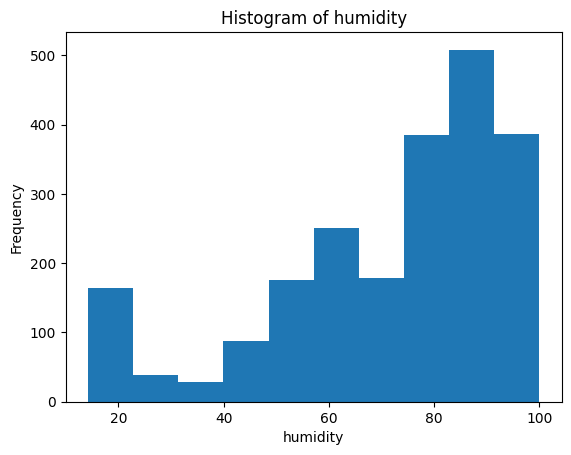

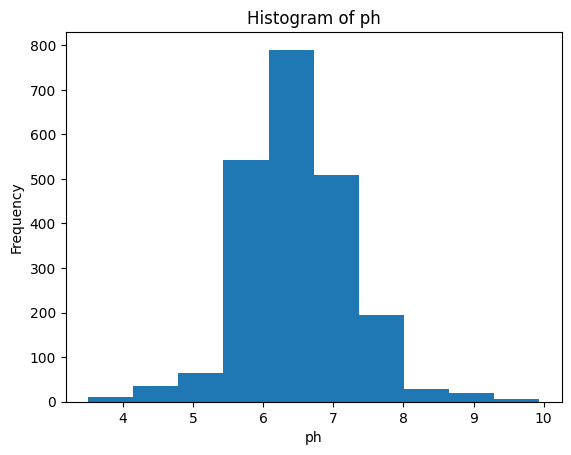

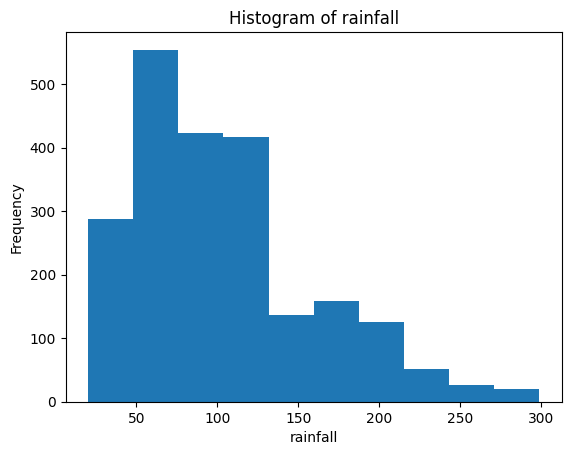

In [14]:
# prompt: plot histogram for all numerical values

for column in df.select_dtypes(include=np.number):
  plt.figure()
  plt.hist(df[column])
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

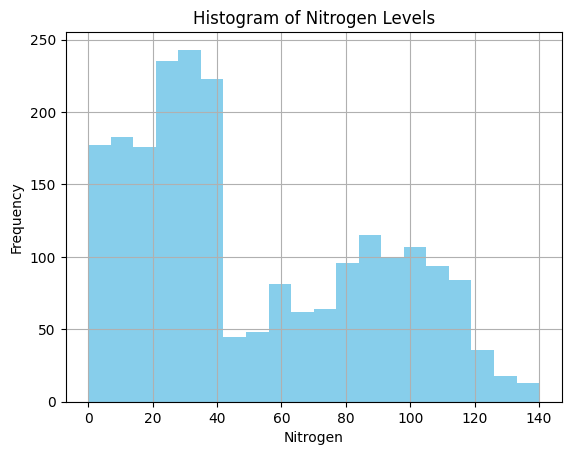

In [15]:
df['Nitrogen'].hist(bins=20, color='skyblue')
plt.title('Histogram of Nitrogen Levels')
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

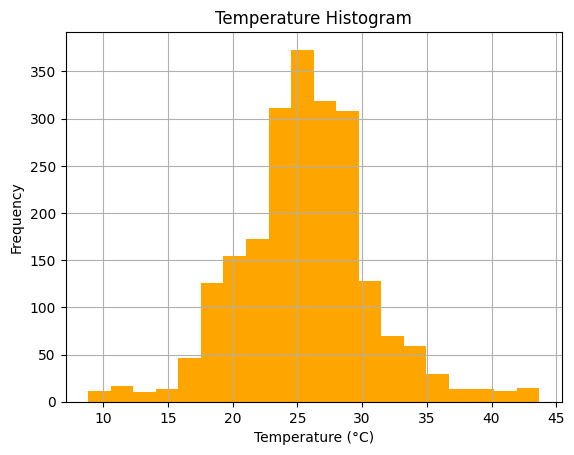

In [16]:
df['temperature'].hist(bins=20, color='orange')
plt.title('Temperature Histogram')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

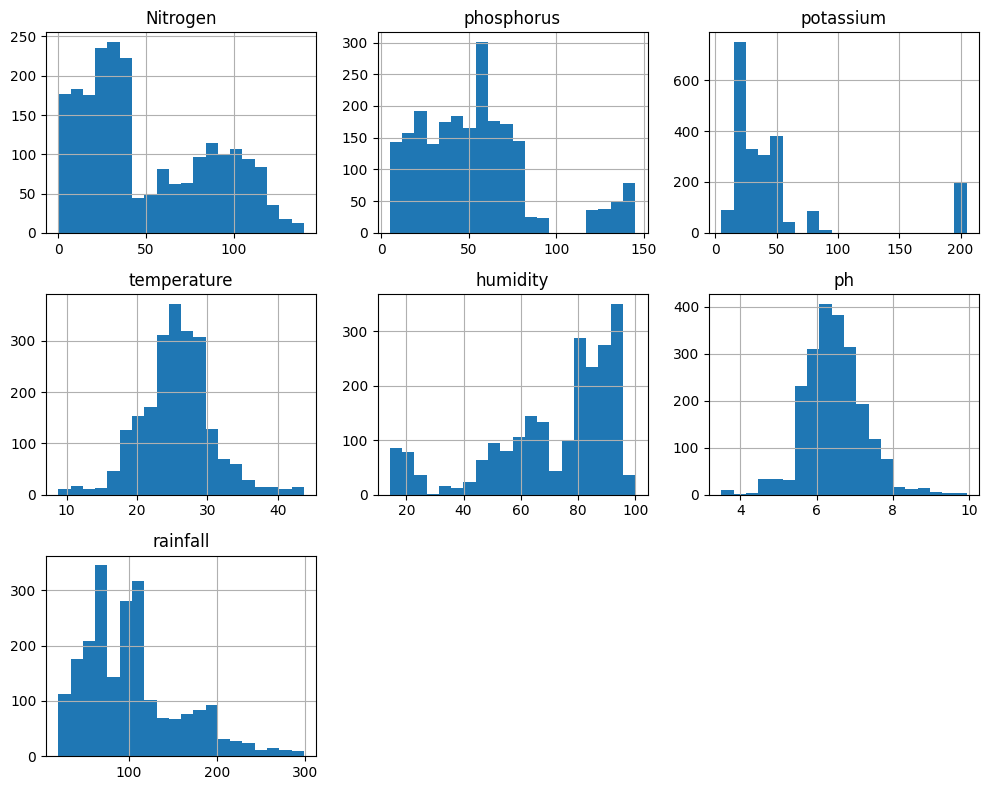

In [17]:
df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

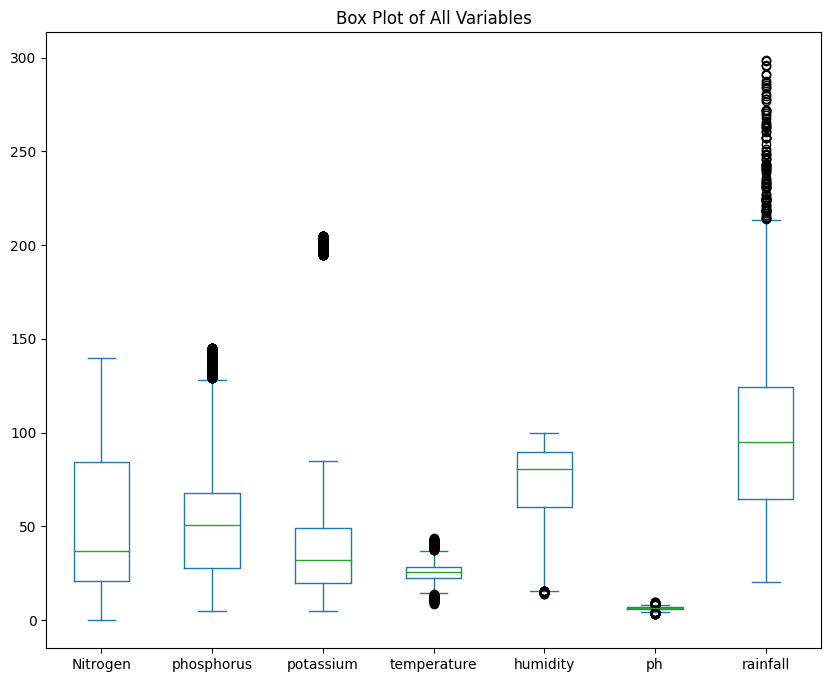

In [18]:
df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].plot(kind='box', figsize=(10, 8))
plt.title('Box Plot of All Variables')
plt.show()

             Nitrogen  phosphorus  potassium  temperature  humidity        ph  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
ph           0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
Nitrogen     0.059020  
phosphorus  -0.063839  
potassium   -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


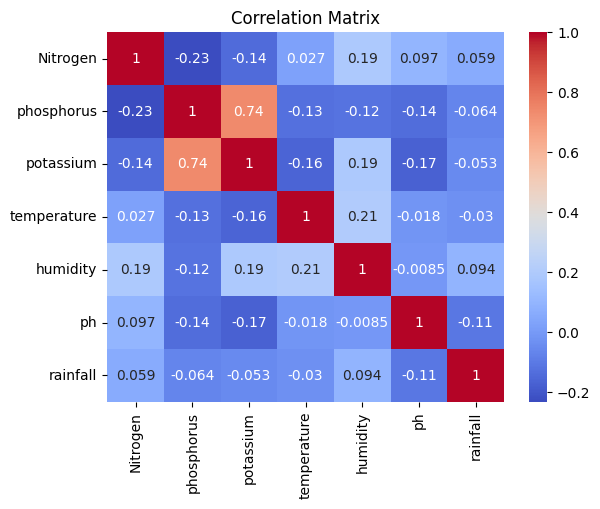

In [19]:
correlation_matrix = df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

print(correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features

y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [ ]:
df.head(5)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [21]:
float_cols = df.select_dtypes(include=['float64']).columns.tolist()

In [22]:
df[float_cols] = df[float_cols].applymap(lambda x: round(x))

<ipython-input-22-a176e493f2c0>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[float_cols] = df[float_cols].applymap(lambda x: round(x))


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nitrogen     2200 non-null   int64 
 1   phosphorus   2200 non-null   int64 
 2   potassium    2200 non-null   int64 
 3   temperature  2200 non-null   int64 
 4   humidity     2200 non-null   int64 
 5   ph           2200 non-null   int64 
 6   rainfall     2200 non-null   int64 
 7   label        2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB
